In [12]:
# Bajar la data
import urllib
DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
DESC_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names'
urllib.request.urlretrieve(DATA_URL, "wine.data")
urllib.request.urlretrieve(DESC_URL, "wine.names")

('wine.names', <http.client.HTTPMessage at 0x240731cf048>)

In [13]:
# importar librerias
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib para que los plots se impriman en el notebook 
%matplotlib inline

In [14]:
# load data
wine = pd.read_csv('wine.data')
wine.columns = ['class', 'alcohol', 'malic_acid', 'ash',
                'alcalinity_of_ash', 'magnesium', 'total_phenols',
                'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                'color_intensity', 'hue', 'od280_od315', 'proline'
               ]
wine.head(5)

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [15]:
wine.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280_od315             0
proline                 0
dtype: int64

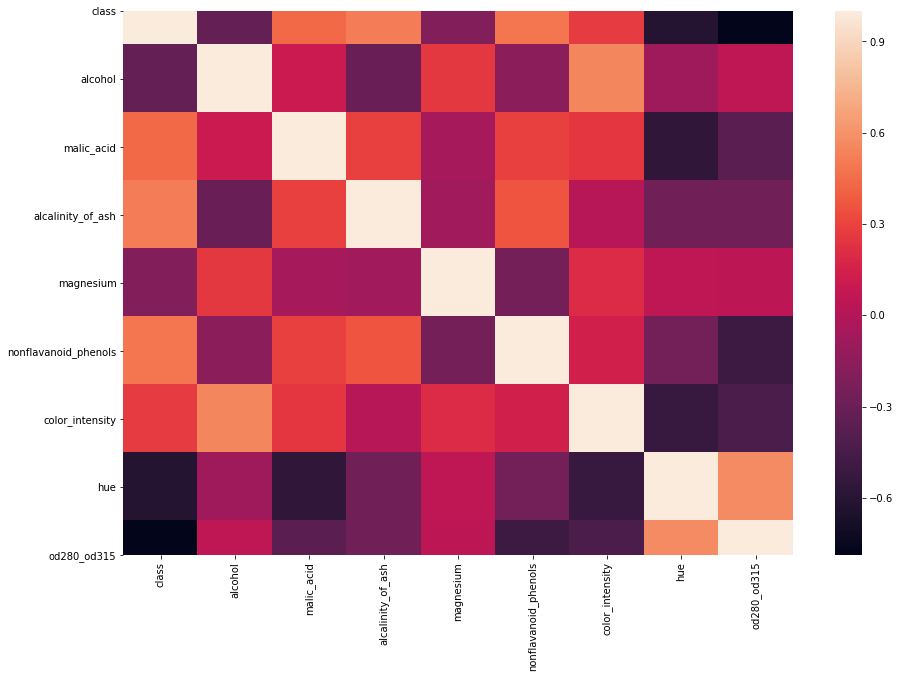

In [35]:
corr = wine[wine.columns].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr)

In [17]:
wine = wine.drop(['proline', 'total_phenols', 'proanthocyanins', 'flavanoids', 'ash'], axis=1)
wine.head(5)

,class,alcohol,malic_acid,alcalinity_of_ash,magnesium,nonflavanoid_phenols,color_intensity,hue,od280_od315
0,1,13.20,1.78,11.2,100,0.26,4.38,1.05,3.40
1,1,13.16,2.36,18.6,101,0.30,5.68,1.03,3.17
2,1,14.37,1.95,16.8,113,0.24,7.80,0.86,3.45
3,1,13.24,2.59,21.0,118,0.39,4.32,1.04,2.93
4,1,14.20,1.76,15.2,112,0.34,6.75,1.05,2.85


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


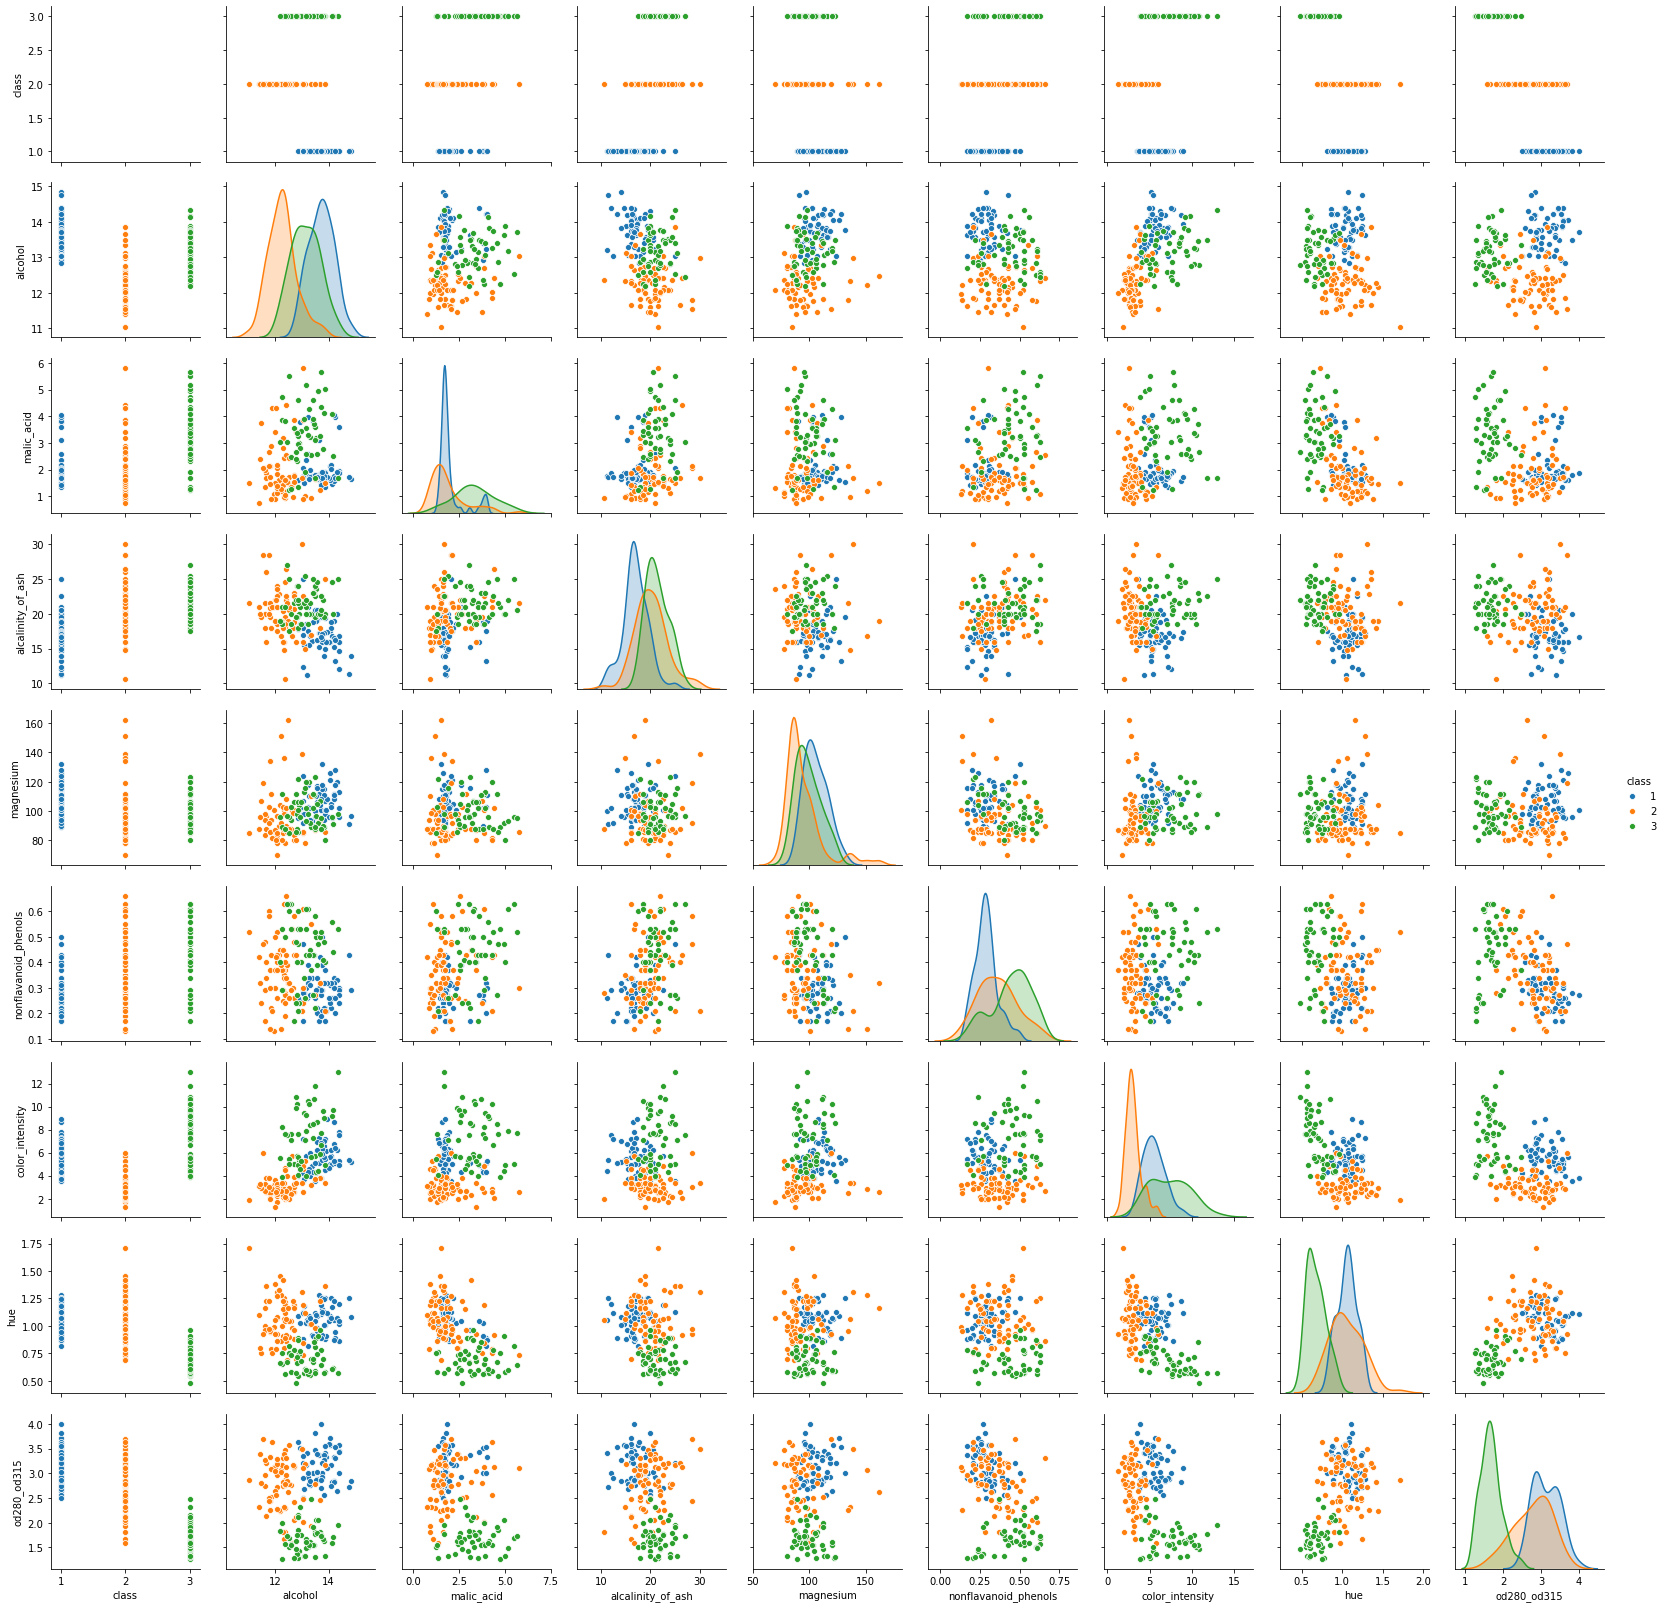

In [18]:
# Plotting the variables against each other
sns.pairplot(wine, hue='class')

In [19]:
# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
# tools
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, validation_curve
import warnings
warnings.filterwarnings("ignore")

In [20]:
X = wine.drop('class', axis=1)
y = wine['class']
X.head(5)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,nonflavanoid_phenols,color_intensity,hue,od280_od315
0,13.20,1.78,11.2,100,0.26,4.38,1.05,3.40
1,13.16,2.36,18.6,101,0.30,5.68,1.03,3.17
2,14.37,1.95,16.8,113,0.24,7.80,0.86,3.45
3,13.24,2.59,21.0,118,0.39,4.32,1.04,2.93
4,14.20,1.76,15.2,112,0.34,6.75,1.05,2.85


In [21]:
# settings
nJobs = psutil.cpu_count()
kFold = 5

In [24]:
# split entire dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(106, 8)
(71, 8)


In [22]:
# helper functions
def evaluate(estimator, X, y, cv, n_jobs=1):
    """
    Print a set of evaluation metrics of given estimator.

    Parameters
    ----------
    estimator : object
        Classifier.
        
    X : array-like, shape (n_samples, n_features)
        Training dataset, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples)
        Label dataset.

    cv : object, optional
        Cross-validation generator.
        
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    metrics = []
    metrics.append(('Accuracy', 'accuracy'))
    metrics.append(('F1', 'f1_macro'))

    for label, name in metrics:
        results = cross_val_score(estimator, X, y, cv=cv, scoring=name, n_jobs=n_jobs)
        print('%s: %.5f +/- %.5f' % (label, np.mean(results), np.std(results)))

def plot_validation_curve(estimator, title, X, y, param_name, param_range,
                          ylim=None, cv=None, n_jobs=1, plot=plt.plot):
    """
    Generate a plot of learning curve.

    Parameters
    ----------
    estimator : object
        Classifier.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training dataset, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples)
        Label dataset.
        
    param_name : string
        Name of the parameter that will be varied.
        
    param_range : array-like, shape (n_values,)
        The values of the parameter that will be evaluated.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : object, optional
        Cross-validation generator.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    plot: object, optional
        Plotting function.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    train_scores, test_scores = validation_curve(estimator, X, y,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=cv, scoring="accuracy",
                                                 n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    lw = 2
    plot(param_range, train_scores_mean, label="Training Accuracy",
         color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plot(param_range, test_scores_mean, label="Cross-validation Accuracy",
         color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), plot=plt.plot):
    """
    Generate a plot of learning curve.

    Parameters
    ----------
    estimator : object
        Classifier.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training dataset, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples)
        Label dataset.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : object, optional
        Cross-validation generator.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    
    plot: object, optional
        Plotting function.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plot(train_sizes, train_scores_mean, 'o-', color="r",
          label="Training Score")
    plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Cross-validation Score")

    plt.legend(loc=4)
    plt.show()

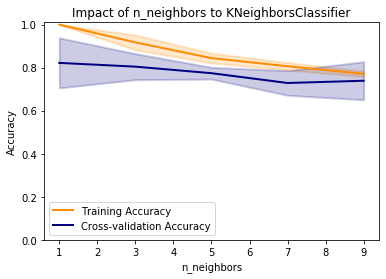

In [25]:
param_name = 'n_neighbors'
param_range = np.arange(1, 11, 2)
plot_validation_curve(KNeighborsClassifier(), 'Impact of n_neighbors to KNeighborsClassifier',
                      X_train, y_train, param_name, param_range, ylim=(0.0, 1.01), cv=kFold,
                      n_jobs=nJobs)

In [26]:
# 5-NN
kNN = KNeighborsClassifier(n_neighbors=5)
evaluate(kNN, X_train, y_train, cv=kFold, n_jobs=nJobs)

Accuracy: 0.77436 +/- 0.02741
F1: 0.77037 +/- 0.02941


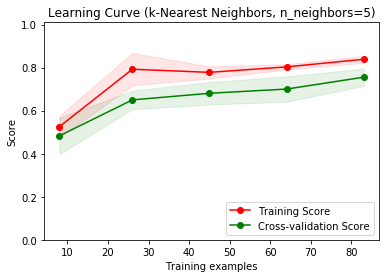

In [37]:
plot_learning_curve(kNN, 'Learning Curve (k-Nearest Neighbors, n_neighbors=5)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)

## Decision Tree

In [38]:
entropyDT = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
entropyDT.fit(X_train, y_train)
yPredEDT = entropyDT.predict(X_test)
scoreEDT = accuracy_score(y_test, yPredEDT)

print("Accuracy of Decition Tree with Entropy: %0.5f" % scoreEDT)

Accuracy of Decition Tree with Entropy: 0.97183


In [39]:
# a decition tree classifier with gini
giniDT = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
giniDT.fit(X_train, y_train)
yPredGDT = giniDT.predict(X_test)
scoreGDT = accuracy_score(y_test, yPredGDT)

print("Accuracy of Decition Tree with Gini: %0.5f" % scoreGDT)

Accuracy of Decition Tree with Gini: 0.92958


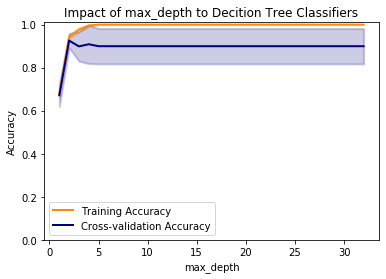

In [40]:
param_name = 'max_depth'
param_range = np.arange(1, 33)
plot_validation_curve(entropyDT, 'Impact of max_depth to Decition Tree Classifiers',
                      X_train, y_train, param_name, param_range, ylim=(0.0, 1.01), cv=kFold,
                      n_jobs=nJobs)

In [41]:
# final decision tree
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
evaluate(decisionTree, X_train, y_train, cv=kFold, n_jobs=nJobs)

Accuracy: 0.89969 +/- 0.08231
F1: 0.89935 +/- 0.07615


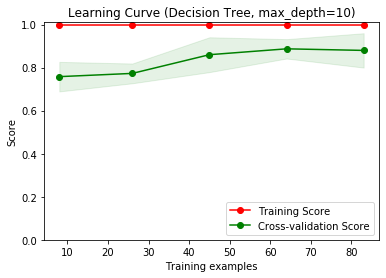

In [42]:
plot_learning_curve(decisionTree, 'Learning Curve (Decision Tree, max_depth=10)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)

In [43]:
nb = GaussianNB()
evaluate(nb, X_train, y_train, cv=kFold, n_jobs=nJobs)

Accuracy: 0.97095 +/- 0.03834
F1: 0.97164 +/- 0.03663


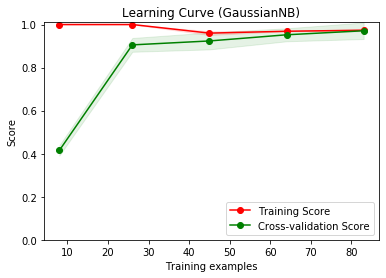

In [44]:
plot_learning_curve(nb, 'Learning Curve (GaussianNB)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)

## Artificial Neural Network

In [45]:
maxIter = 400
params = [
    {'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2},
    {'learning_rate': 'constant', 'momentum': .9, 'nesterovs_momentum': False,
     'learning_rate_init': 0.2},
    {'learning_rate': 'constant', 'momentum': .9, 'nesterovs_momentum': True,
     'learning_rate_init': 0.2},
    {'learning_rate': 'invscaling', 'momentum': 0, 'learning_rate_init': 0.2},
    {'learning_rate': 'invscaling', 'momentum': .9, 'nesterovs_momentum': True,
     'learning_rate_init': 0.2},
    {'learning_rate': 'invscaling', 'momentum': .9, 'nesterovs_momentum': False,
     'learning_rate_init': 0.2}
]
labels = [
    "constant learning-rate", "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate", "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum"
]

In [46]:
def train_mlp(solver, X_train, y_train):
    for label, param in zip(labels, params):
        mlp = MLPClassifier(solver=solver, max_iter=maxIter, **param)
        mlp.fit(X_train, y_train)
        print("%s + %s" % (solver, label))
        print("\tTraining set score: %f" % mlp.score(X_train, y_train))
        print("\tTraining set loss: %f" % mlp.loss_)

In [47]:
solver = 'lbfgs'
train_mlp(solver, X_train, y_train)

lbfgs + constant learning-rate
	Training set score: 0.924528
	Training set loss: 0.143807
lbfgs + constant with momentum
	Training set score: 0.915094
	Training set loss: 0.169769
lbfgs + constant with Nesterov's momentum
	Training set score: 0.933962
	Training set loss: 0.153135
lbfgs + inv-scaling learning-rate
	Training set score: 0.933962
	Training set loss: 0.153483
lbfgs + inv-scaling with momentum
	Training set score: 0.886792
	Training set loss: 0.235551
lbfgs + inv-scaling with Nesterov's momentum
	Training set score: 0.924528
	Training set loss: 0.181784


In [48]:
solver = 'sgd'
train_mlp(solver, X_train, y_train)

sgd + constant learning-rate
	Training set score: 0.396226
	Training set loss: 1.195084
sgd + constant with momentum
	Training set score: 0.396226
	Training set loss: 14.776300
sgd + constant with Nesterov's momentum
	Training set score: 0.396226
	Training set loss: 5.236716
sgd + inv-scaling learning-rate
	Training set score: 0.339623
	Training set loss: 1.120985
sgd + inv-scaling with momentum
	Training set score: 0.396226
	Training set loss: 1.264563
sgd + inv-scaling with Nesterov's momentum
	Training set score: 0.396226
	Training set loss: 1.196105


In [49]:
solver = 'adam'
train_mlp(solver, X_train, y_train)

adam + constant learning-rate
	Training set score: 0.396226
	Training set loss: 1.091401
adam + constant with momentum
	Training set score: 0.396226
	Training set loss: 1.141504
adam + constant with Nesterov's momentum
	Training set score: 0.273585
	Training set loss: 15.445594
adam + inv-scaling learning-rate
	Training set score: 0.396226
	Training set loss: 1.193599
adam + inv-scaling with momentum
	Training set score: 0.358491
	Training set loss: 1.141633
adam + inv-scaling with Nesterov's momentum
	Training set score: 0.396226
	Training set loss: 1.107325


In [50]:
solver = 'lbfgs'
param = {'learning_rate_init': 0.2}
mlp = MLPClassifier(solver=solver, max_iter=maxIter, **param)
evaluate(mlp, X_train, y_train, cv=kFold, n_jobs=nJobs)

Accuracy: 0.85764 +/- 0.04521
F1: 0.86899 +/- 0.05119


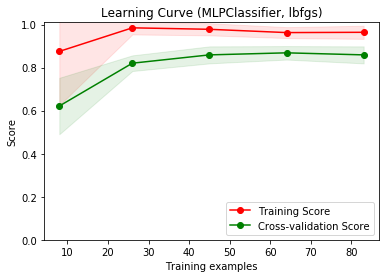

In [51]:
plot_learning_curve(mlp, 'Learning Curve (MLPClassifier, lbfgs)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)

## Support Vector Machine

In [52]:
maxIter = 400
params = [
    {'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False},
    {'penalty': 'l2', 'loss': 'squared_hinge', 'dual': True},
    {'penalty': 'l2', 'loss': 'squared_hinge', 'dual': False}
]
labels = [
    "l1 + squared_hinge + dual: false", "l2 + squared_hinge + dual: true",
    "l2 + squared_hinge + dual: false"
]

In [53]:
def train_svm(X_train, y_train):
    for label, param in zip(labels, params):
        svm = LinearSVC(max_iter=maxIter, **param)
        svm.fit(X_train, y_train)
        print("%s" % (label))
        print("\tTraining set score: %f" % svm.score(X_train, y_train))

In [54]:
train_svm(X_train, y_train)

l1 + squared_hinge + dual: false
	Training set score: 0.943396
l2 + squared_hinge + dual: true
	Training set score: 0.745283
l2 + squared_hinge + dual: false
	Training set score: 0.924528


The above results of different hyperparameter combinations indicate the best configuration is {'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False}

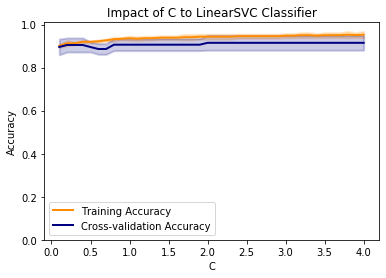

In [55]:
param_name = 'C'
param_range = np.arange(0.1, 4.1, 0.1)
param = {'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False}
plot_validation_curve(LinearSVC(max_iter=maxIter, **param),
                      'Impact of C to LinearSVC Classifier',
                      X_train, y_train, param_name, param_range, ylim=(0.0, 1.01), cv=kFold,
                      n_jobs=nJobs)

In [56]:
param = {'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False, 'C': 2.1}
svm = LinearSVC(max_iter=maxIter, **param)
evaluate(svm, X_train, y_train, cv=kFold, n_jobs=nJobs)

Accuracy: 0.91498 +/- 0.03440
F1: 0.92007 +/- 0.03062


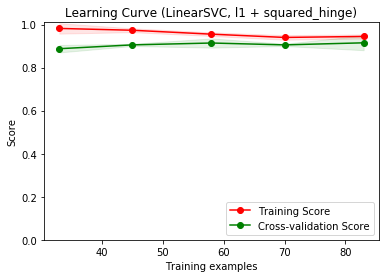

In [57]:
plot_learning_curve(svm, 'Learning Curve (LinearSVC, l1 + squared_hinge)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs, train_sizes=np.linspace(.4, 1.0, 5))

## Ensemble Classifier

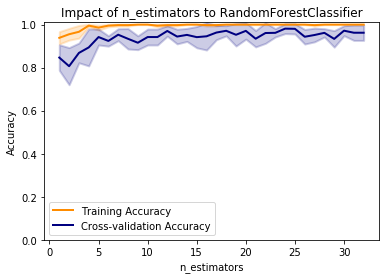

In [58]:
param_name = 'n_estimators'
param_range = np.arange(1, 33)
plot_validation_curve(RandomForestClassifier(n_jobs=nJobs),
                      'Impact of n_estimators to RandomForestClassifier',
                      X_train, y_train, param_name, param_range, ylim=(0.0, 1.01), cv=kFold,
                      n_jobs=nJobs)

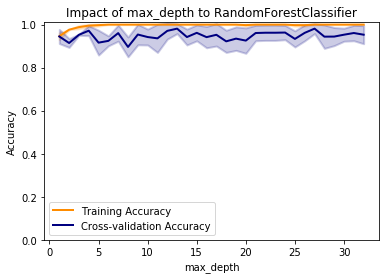

In [59]:
param_name = 'max_depth'
param_range = np.arange(1, 33)
plot_validation_curve(RandomForestClassifier(n_jobs=nJobs, n_estimators=17),
                      'Impact of max_depth to RandomForestClassifier',
                      X_train, y_train, param_name, param_range, ylim=(0.0, 1.01), cv=kFold,
                      n_jobs=nJobs)

In [60]:
param = {'n_estimators': 17, 'max_depth': 10}
rfc = RandomForestClassifier(n_jobs=nJobs, **param)
evaluate(rfc, X_train, y_train, cv=kFold, n_jobs=nJobs)

Accuracy: 0.95095 +/- 0.04369
F1: 0.97265 +/- 0.02270


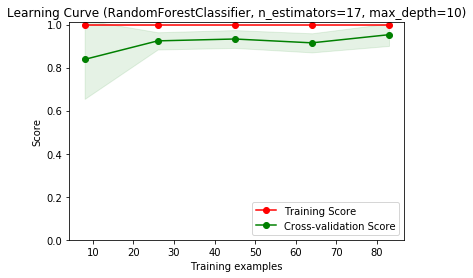

In [61]:
plot_learning_curve(rfc, 'Learning Curve (RandomForestClassifier, n_estimators=17, max_depth=10)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)

# Make Predictions and Evaluate Performance on The Test Set

## k-Nearest Neighbors

In [62]:
evaluate(kNN, X_test, y_test, cv=kFold, n_jobs=nJobs)

Accuracy: 0.64388 +/- 0.09084
F1: 0.62510 +/- 0.08695


## Decision Tree

In [63]:
evaluate(decisionTree, X_test, y_test, cv=kFold, n_jobs=nJobs)

Accuracy: 0.91289 +/- 0.08740
F1: 0.91260 +/- 0.08925


## Naïve Bayes

In [64]:
evaluate(nb, X_test, y_test, cv=kFold, n_jobs=nJobs)

Accuracy: 0.92938 +/- 0.04233
F1: 0.92949 +/- 0.04261


## Artificial Neural Network

In [65]:
evaluate(mlp, X_test, y_test, cv=kFold, n_jobs=nJobs)

Accuracy: 0.81766 +/- 0.12407
F1: 0.82658 +/- 0.07515


## Support Vector Machine

In [67]:
evaluate(svm, X_test, y_test, cv=kFold, n_jobs=nJobs)

Accuracy: 0.90271 +/- 0.08934
F1: 0.90444 +/- 0.08664


## Ensemble Classifier

In [68]:
evaluate(rfc, X_test, y_test, cv=kFold, n_jobs=nJobs)

Accuracy: 0.94271 +/- 0.05359
F1: 0.93045 +/- 0.06307


# Select Hyperparameter Using GridSearchCV

# LinearSVC Classifier

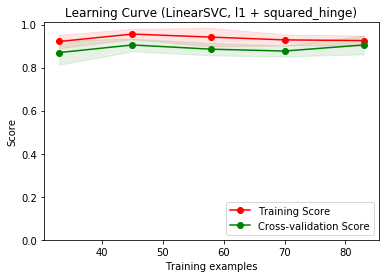

In [71]:
from sklearn.model_selection import learning_curve, GridSearchCV
param = {'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False}
svm = LinearSVC(max_iter=maxIter, **param)
est = GridSearchCV(svm, param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(est, 'Learning Curve (LinearSVC, l1 + squared_hinge)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs, train_sizes=np.linspace(.4, 1.0, 5))

In [72]:
print("Chosen parameter on 100 datapoints: %s" % est.fit(X_train[:100], y_train[:100]).best_params_)

Chosen parameter on 100 datapoints: {'C': 10.0}


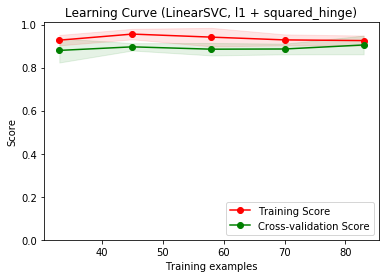

In [73]:
param = {'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False, 'C': 10.0}
svm = LinearSVC(max_iter=maxIter, **param)
plot_learning_curve(est, 'Learning Curve (LinearSVC, l1 + squared_hinge)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs, train_sizes=np.linspace(.4, 1.0, 5))

## Decision Tree Classifier

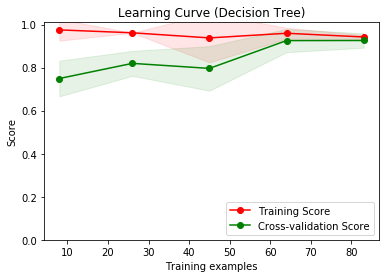

In [74]:
decisionTree = DecisionTreeClassifier(random_state=0)
est = GridSearchCV(decisionTree, param_grid={"max_depth": np.arange(1, 33)})
plot_learning_curve(est, 'Learning Curve (Decision Tree)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)

In [76]:
print("Chosen parameter on 100 datapoints: %s" % est.fit(X_train[:100], y_train[:100]).best_params_)

Chosen parameter on 100 datapoints: {'max_depth': 2}


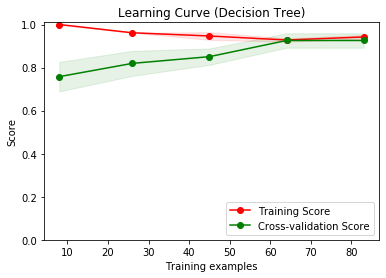

In [77]:
decisionTree = DecisionTreeClassifier(max_depth=2, random_state=0)
plot_learning_curve(decisionTree, 'Learning Curve (Decision Tree)',
                    X_train, y_train, ylim=(0.0, 1.01), cv=kFold, n_jobs=nJobs)